# Exploring the data

In [29]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import glob

#################
# Plot parameters
params = {
    "font.size": 11,
    "font.family": "Arial Black",
    "text.usetex": True,
    "mathtext.fontset": "custom",
    "figure.figsize": (4, 3),
    "figure.subplot.left": 0.15,
    "figure.subplot.right": 0.95,
    "figure.subplot.bottom": 0.16,
    "figure.subplot.top": 0.95,
    "figure.subplot.wspace": 0.3,
    "figure.subplot.hspace": 0.3,
    "lines.markersize": 2,
    "lines.linewidth": 1.5,
}
plt.rcParams.update(params)

##################
# Halo Class

class classhalo:
    def __init__(self, file_path, type = 'all' ):
        self.file_path = file_path
        self.get_group_attributes(type)

    def get_group_attributes(self, type):
        with h5py.File(self.file_path, "r") as file:
            halo_data_group = file["Halo_data"]
            profile_data_group = file["Profile_data"]
            
            self.kappa = halo_data_group["kappa"][:]
            if type == 'disk':
                select = np.where(halo_data_group["kappa"][:] >= 0.3)[0]
            if type == 'elliptical':
                select = np.where(halo_data_group["kappa"][:] < 0.3)[0]
            if type == 'all':
                select = np.where(halo_data_group["kappa"][:] > 0)[0]
            

            # Halo_data attributes
            self.AxisRadius = halo_data_group["AxisRadius"][:]
            self.CrossSection = halo_data_group["CrossSection"][:, select]
            self.DMMajorAxis_a = halo_data_group["DMMajorAxis_a"][:, select]
            self.DMMinorAxis_b = halo_data_group["DMMinorAxis_b"][:, select]
            self.DMMinorAxis_c = halo_data_group["DMMinorAxis_c"][:, select]
            self.DMNparticlesWithinAxisRadius = halo_data_group["DMNparticlesWithinAxisRadius"][:, select]
            self.DynamicalRelaxation = halo_data_group["DynamicalRelaxation"][select]
            self.GalaxyHalfLightRadius = halo_data_group["GalaxyHalfLightRadius"][select]
            self.GalaxyHalfMassRadius = halo_data_group["GalaxyHalfMassRadius"][select]
            self.GalaxyLuminosity = halo_data_group["GalaxyLuminosity"][select]
            self.GalaxyProjectedHalfLightRadius = halo_data_group["GalaxyProjectedHalfLightRadius"][select]
            self.GalaxyProjectedHalfMassRadius = halo_data_group["GalaxyProjectedHalfMassRadius"][select]
            self.ID = halo_data_group["ID"][select]
            self.M200c = halo_data_group["M200c"][select]
            self.Metallicity = halo_data_group["Metallicity"][select]
            self.Mgas = halo_data_group["Mgas"][select]
            self.Mstar = halo_data_group["Mstar"][select]
            self.R200c = halo_data_group["R200c"][select]
            self.SFR = halo_data_group["SFR"][select]
            self.SpecificAngularMomentum = halo_data_group["SpecificAngularMomentum"][select,:]
            self.StructureType = halo_data_group["StructureType"][select]
            self.Vmax = halo_data_group["Vmax"][select]
            self.c200c = halo_data_group["c200c"][select]

            sarg =0

            # Profile_data attributes
            self.Circular_Velocity = profile_data_group["Circular_Velocity"][:, select]
            self.Dark_matter_Circular_Velocity = profile_data_group["Dark_matter_Circular_Velocity"][:, select]
            self.Dark_matter_Density_profile = profile_data_group["Dark_matter_Density_profile"][sarg:,select]
            self.Dark_matter_Sigma_profile = profile_data_group["Dark_matter_Sigma_profile"][sarg:,select]
            self.Dark_matter_Velocity_dispersion = profile_data_group["Dark_matter_Velocity_dispersion"][sarg:,select]
            self.Density_profile = profile_data_group["Density_profile"][sarg:,select]
            self.Density_radial_bins = profile_data_group["Density_radial_bins"][sarg:]
            self.Gas_Circular_Velocity = profile_data_group["Gas_Circular_Velocity"][:,select]
            self.Gas_Density_profile = profile_data_group["Gas_Density_profile"][sarg:,select]
            self.Gas_Velocity_dispersion = profile_data_group["Gas_Velocity_dispersion"][sarg:,select]
            self.Stars_Circular_Velocity = profile_data_group["Stars_Circular_Velocity"][:,select]
            self.Stars_Density_profile = profile_data_group["Stars_Density_profile"][sarg:,select]
            self.Stars_Velocity_dispersion = profile_data_group["Stars_Velocity_dispersion"][sarg:,select]
            self.Velocity_radial_bins = profile_data_group["Velocity_radial_bins"][:]

            # Calculated attributes
            self.fDM = profile_data_group["Dark_matter_Density_profile"][sarg:,select]/profile_data_group["Density_profile"][sarg:,select]

        
file_paths = ['Halo_data_L025N376WeakStellarFBSigmaVelDep60Anisotropic.hdf5',
              'Halo_data_L025N376WeakStellarFBSigmaVelDep30Anisotropic.hdf5',
              'Halo_data_L025N376WeakStellarFBSigmaConstant00.hdf5',
              'Halo_data_L025N376ReferenceSigmaConstant00.hdf5', 
              'Halo_data_L025N376ReferenceSigmaVelDep30Anisotropic.hdf5', 
              'Halo_data_L025N376ReferenceSigmaVelDep60Anisotropic.hdf5']

file_names = ['WSFB60', 'WSFB30', 'WSFBconst', 'Ref60', 'Ref30', 'Refconst']


### Dark Matter Fraction as a function of the stellar mass

/tmp/ipykernel_1709677/1573278245.py:93: RuntimeWarning: divide by zero encountered in divide
  self.fDM = profile_data_group["Dark_matter_Density_profile"][sarg:,select]/profile_data_group["Density_profile"][sarg:,select]
/tmp/ipykernel_1709677/1573278245.py:93: RuntimeWarning: invalid value encountered in divide
  self.fDM = profile_data_group["Dark_matter_Density_profile"][sarg:,select]/profile_data_group["Density_profile"][sarg:,select]


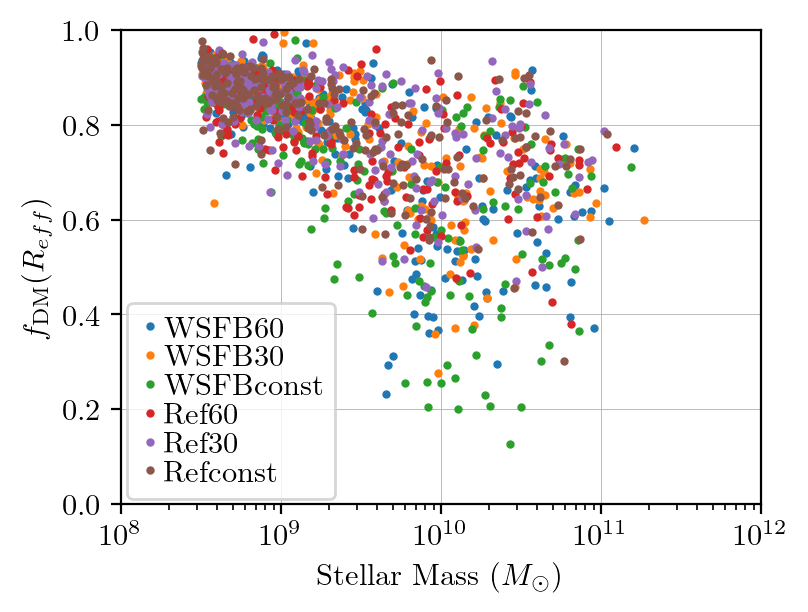

In [30]:
plt.figure(dpi=200) 

for j, file_path in enumerate(file_paths):
    halo = classhalo(file_path, type = 'all')

    M = 10**halo.Mstar
    fDM = halo.fDM
    f = []
    for k in range(len(fDM[0,:])):
        f.append(np.interp(halo.GalaxyHalfLightRadius[k], halo.Density_radial_bins, fDM[:,k]))

    plt.plot(M, f, 'o', label=file_names[j])  

plt.xlabel(r'Stellar Mass ($M_{\odot}$)')
plt.ylabel(r'$f_{\mathrm{DM}}(R_{eff})$')
plt.ylim([0, 1])
plt.xlim([10**8, 10**12])
plt.xscale('log')
plt.legend(loc=[0.01, 0.01], labelspacing=0.05,
           handlelength=0.7, handletextpad=0.1,
           frameon=True, fontsize=11, ncol=1)
plt.grid(linestyle='-', linewidth=0.3)
plt.show()

/tmp/ipykernel_1709677/1573278245.py:93: RuntimeWarning: divide by zero encountered in divide
  self.fDM = profile_data_group["Dark_matter_Density_profile"][sarg:,select]/profile_data_group["Density_profile"][sarg:,select]
/tmp/ipykernel_1709677/1573278245.py:93: RuntimeWarning: invalid value encountered in divide
  self.fDM = profile_data_group["Dark_matter_Density_profile"][sarg:,select]/profile_data_group["Density_profile"][sarg:,select]


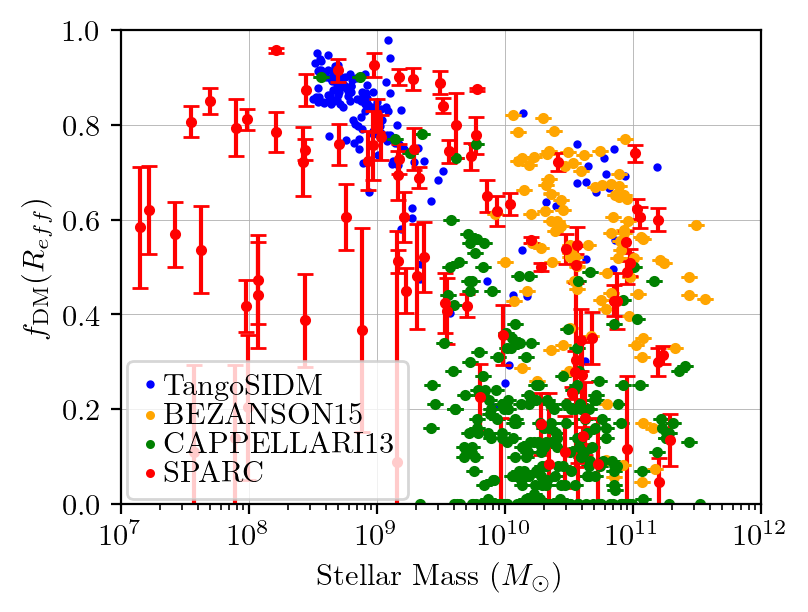

In [31]:
file_paths = ['Halo_data_L025N376WeakStellarFBSigmaVelDep60Anisotropic.hdf5',
              'Halo_data_L025N376WeakStellarFBSigmaVelDep30Anisotropic.hdf5',
              'Halo_data_L025N376WeakStellarFBSigmaConstant00.hdf5',
              'Halo_data_L025N376ReferenceSigmaConstant00.hdf5', 
              'Halo_data_L025N376ReferenceSigmaVelDep30Anisotropic.hdf5', 
              'Halo_data_L025N376ReferenceSigmaVelDep60Anisotropic.hdf5']

file_names += ['WSFB60', 'WSFB30', 'WSFBconst', 'Ref60', 'Ref30', 'Refconst']

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

file_names = []
plt.figure(dpi=200)



file_paths = ['Halo_data_L025N376WeakStellarFBSigmaConstant00.hdf5',]

file_names = ['TangoSIDM']

for j, file_path in enumerate(file_paths):
    halo = classhalo(file_path, type='elliptical')

    M = 10**halo.Mstar
    fDM = halo.fDM
    f = []
    for k in range(len(fDM[0,:])):
        f.append(np.interp(halo.GalaxyHalfLightRadius[k], halo.Density_radial_bins, fDM[:,k]))

    # Utilisation des couleurs définies pour chaque type de données
    plt.plot(M, f, 'o', color=colors[j], label=file_names[j])

for file_path in glob.glob('dataset/*.csv'):
    file_name = file_path.split('/')[-1].split('.')[0]
    file_names.append(file_name)
    
    df = pd.read_csv(file_path)
    M = np.float64(np.array(df["M*"].iloc[1:].values))
    fDMReff = np.array(df['fDM(Reff)'].iloc[1:].values)
    sigma_fdmReff = np.array(df['sigma_fdm(Reff)'].iloc[1:].values)
    # Adding the transformation from Salpeter IMF to Chabrier.
    if file_name == 'CAPPELLARI13':
        M = 10**(np.log10(M)-0.25)
        
    # Utilisation des couleurs définies pour chaque type de données
    plt.scatter(M, fDMReff, color=colors[len(file_names) - 1], label=file_name, s=5)
    plt.errorbar(M, fDMReff, yerr=sigma_fdmReff, fmt='o', markersize=3, capsize=3, color=colors[len(file_names) - 1])

plt.xlabel(r'Stellar Mass ($M_{\odot}$)')
plt.ylabel(r'$f_{\mathrm{DM}}(R_{eff})$')
plt.ylim([0, 1])
plt.xlim([10**7, 10**12])
plt.xscale('log')
plt.legend(loc=[0.01, 0.01], labelspacing=0.05,
           handlelength=0.7, handletextpad=0.1,
           frameon=True, fontsize=11, ncol=1)
plt.grid(linestyle='-', linewidth=0.3)
plt.show()


### Dark Matter Fraction as a function of the halo mass

/tmp/ipykernel_1709677/1573278245.py:93: RuntimeWarning: divide by zero encountered in divide
  self.fDM = profile_data_group["Dark_matter_Density_profile"][sarg:,select]/profile_data_group["Density_profile"][sarg:,select]
/tmp/ipykernel_1709677/1573278245.py:93: RuntimeWarning: invalid value encountered in divide
  self.fDM = profile_data_group["Dark_matter_Density_profile"][sarg:,select]/profile_data_group["Density_profile"][sarg:,select]


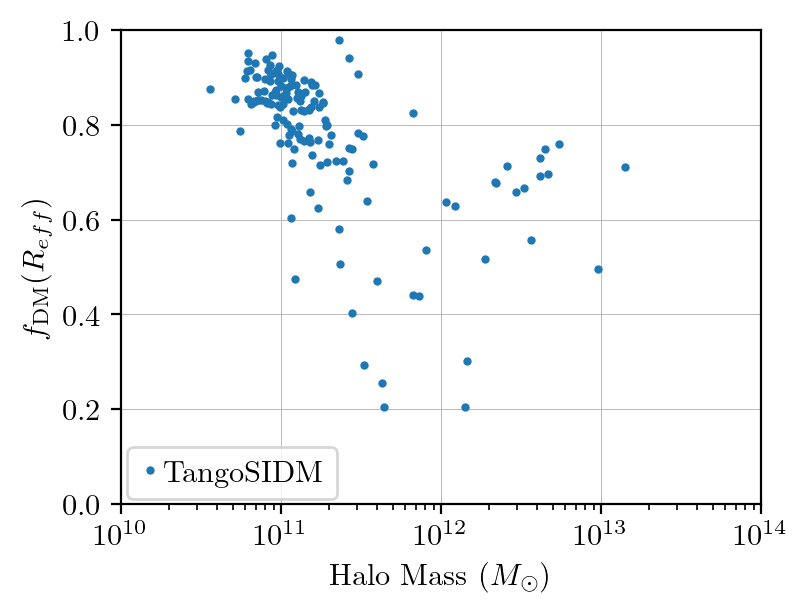

In [32]:
plt.figure(dpi=200)  

for j, file_path in enumerate(file_paths):
    halo = classhalo(file_path, type = 'elliptical')

    M = 10**halo.M200c
    fDM = halo.fDM
    f = []
    for k in range(len(fDM[0,:])):
        f.append(np.interp(halo.GalaxyHalfLightRadius[k], halo.Density_radial_bins, fDM[:,k]))

    plt.plot(M, f, 'o', label=file_names[j])  

plt.xlabel(r'Halo Mass ($M_{\odot}$)')
plt.ylabel(r'$f_{\mathrm{DM}}(R_{eff})$')
plt.ylim([0, 1])
plt.xlim([10**10, 10**14])
plt.xscale('log')
plt.legend(loc=[0.01, 0.01], labelspacing=0.05,
           handlelength=0.7, handletextpad=0.1,
           frameon=True, fontsize=11, ncol=1)
plt.grid(linestyle='-', linewidth=0.3)
plt.show()

### Dark Matter Fraction as a function of the effective radius

/tmp/ipykernel_1709677/1573278245.py:93: RuntimeWarning: invalid value encountered in divide
  self.fDM = profile_data_group["Dark_matter_Density_profile"][sarg:,select]/profile_data_group["Density_profile"][sarg:,select]


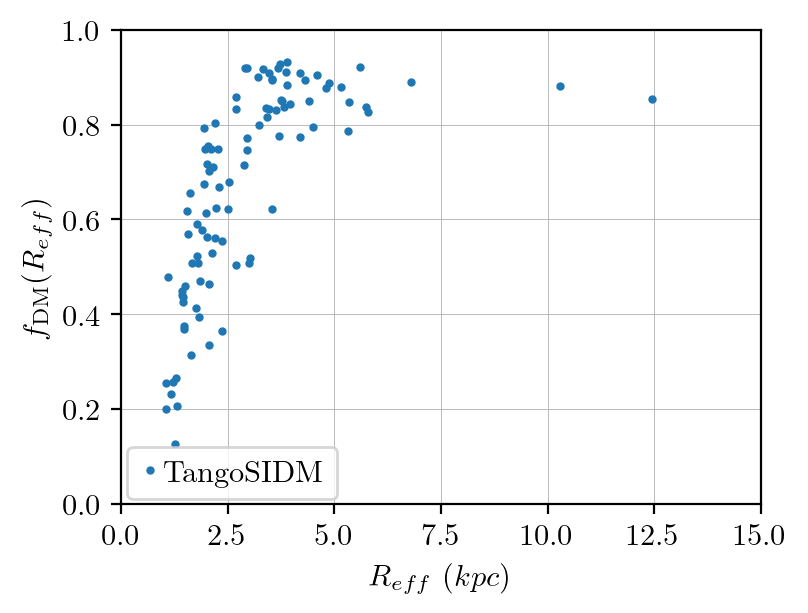

In [33]:
plt.figure(dpi=200)  

for j, file_path in enumerate(file_paths):
    halo = classhalo(file_path, type = 'disk')

    Reff = halo.GalaxyHalfLightRadius
    fDM = halo.fDM
    f = []
    for k in range(len(fDM[0,:])):
        f.append(np.interp(halo.GalaxyHalfLightRadius[k], halo.Density_radial_bins, fDM[:,k]))

    plt.plot(Reff, f, 'o', label=file_names[j])  

plt.xlabel(r'$R_{eff}$ ($kpc$)')
plt.ylabel(r'$f_{\mathrm{DM}}(R_{eff})$')
plt.ylim([0, 1])
plt.xlim([0, 15])

plt.legend(loc=[0.01, 0.01], labelspacing=0.05,
           handlelength=0.7, handletextpad=0.1,
           frameon=True, fontsize=11, ncol=1)
plt.grid(linestyle='-', linewidth=0.3)
plt.show()

### Dark Matter Fraction as a function of the radius for 1 galaxy

/tmp/ipykernel_1709677/1573278245.py:93: RuntimeWarning: invalid value encountered in divide
  self.fDM = profile_data_group["Dark_matter_Density_profile"][sarg:,select]/profile_data_group["Density_profile"][sarg:,select]


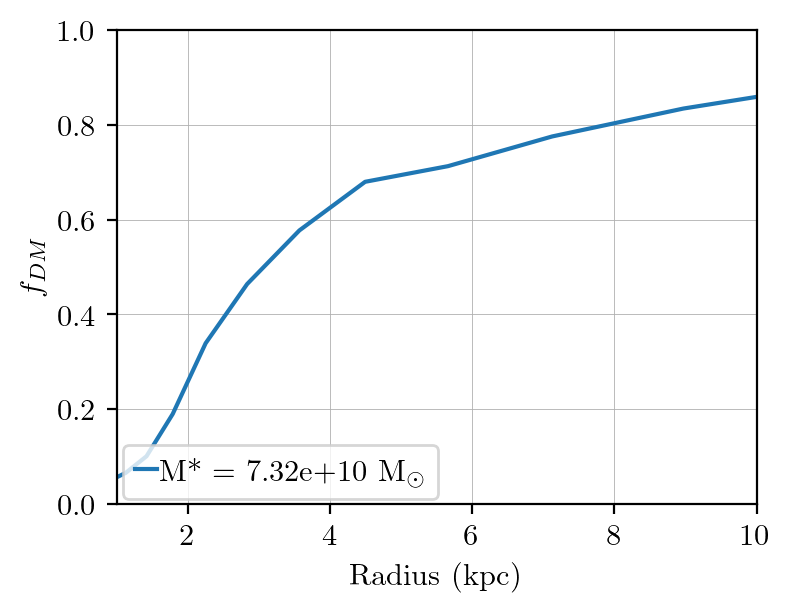

In [34]:
plt.figure(dpi = 200)
ax = plt.subplot(1, 1, 1)
halo = classhalo(file_path, type = 'disk')

mass = halo.Mstar
target = 11
i = np.argmin(np.abs(mass-target))


fDM = halo.Dark_matter_Density_profile[:,i]/halo.Density_profile[:,i]
radius = halo.Density_radial_bins
plt.plot(radius, fDM, label='M* = {:.2e} M$_{{\odot}}$'.format(10**halo.Mstar[i]))



plt.xlim([1,10])
plt.xlabel('Radius (kpc)')
plt.ylabel(r'$f_{DM}$')
plt.ylim([0,1])
plt.legend(loc=[0.01, 0.01], labelspacing=0.05,
           handlelength=0.7, handletextpad=0.1,
           frameon=True, fontsize=11, ncol=1)
plt.grid(linestyle='-', linewidth=0.3)


### Dark Matter Fraction as a function of the radius for 1 galaxy

In [35]:
halo = classhalo(file_path, type = 'disk')
maxval = 5e10
minval = 9e9
i = np.where((10**halo.Mstar<maxval) & (10**halo.Mstar>minval))[0]
nbgal = len(i)
nbgal

/tmp/ipykernel_1709677/1573278245.py:93: RuntimeWarning: invalid value encountered in divide
  self.fDM = profile_data_group["Dark_matter_Density_profile"][sarg:,select]/profile_data_group["Density_profile"][sarg:,select]


36

(40, 97)


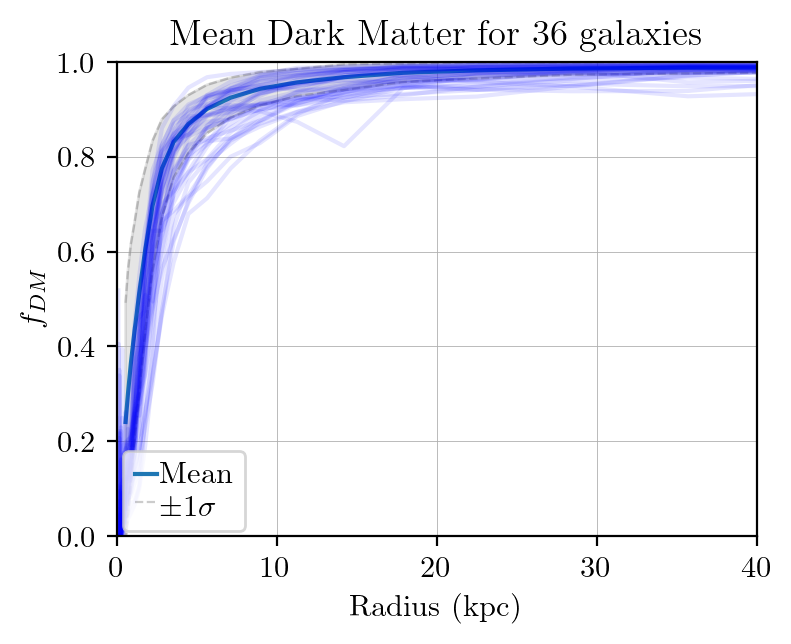

In [36]:
common_radii = radius
fDM = halo.fDM

print(fDM.shape)
# Calculate the mean and standard deviation
mean_values = np.mean(fDM, axis=1)
std_deviation = np.std(fDM, axis=1)

plt.figure(dpi=200)
plt.plot(common_radii, mean_values, label='Mean')

# Plot the curves for the standard deviation
plt.plot(common_radii, mean_values + std_deviation, '--', label=r'$\pm 1\sigma$', color='gray', linewidth=0.8, alpha=0.4)
plt.plot(common_radii, mean_values - std_deviation, '--', color='gray', linewidth=0.8, alpha=0.4)

# Fill the area between the two standard deviation curves with adjusted transparency
plt.fill_between(common_radii, mean_values - std_deviation, mean_values + std_deviation, color='gray', alpha=0.2)

for i in range(len(fDM)):
    plt.plot(common_radii, fDM[:, i], color='blue', alpha=0.1)

plt.ylim([0, 1])
plt.xlim([0,40])
plt.xlabel('Radius (kpc)')
plt.ylabel(r'$f_{DM}$')
plt.title('Mean Dark Matter for '+str(nbgal)+' galaxies')
plt.legend(loc=[0.01, 0.01], labelspacing=0.05,
           handlelength=0.7, handletextpad=0.1,
           frameon=True, fontsize=11, ncol=1)
plt.grid(linestyle='-', linewidth=0.3)
plt.show()


## Comparison with observational data

In [37]:
def string_to_array(string):
    """
    Convert a string representing an array in a CSV file to an array.

    Args:
        string (str): The string representing the array.

    Returns:
        numpy.ndarray: The array converted from the string.
    """
    array = []
    for i in range(len(string)):
        element = string[i][0]
        array.append(np.array(eval(element)))

    return array


In [38]:
# Loading the dataset
df = pd.read_csv('dataset/SPARC.csv', header=[0,1])

/tmp/ipykernel_1709677/741022718.py:53: RuntimeWarning: invalid value encountered in divide
  fDM = halo.Dark_matter_Density_profile[:,i]/halo.Density_profile[:,i]


36


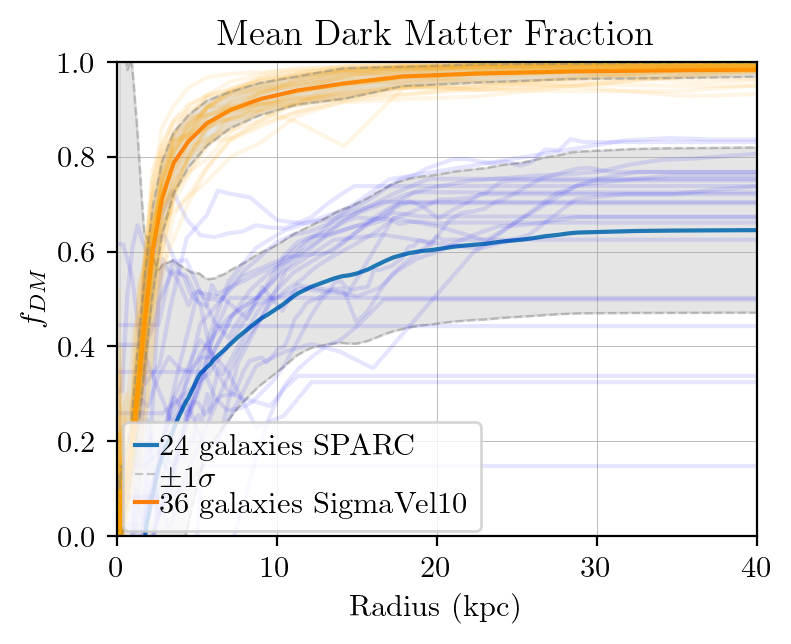

In [39]:
plt.figure(dpi=200)
maxval = 5e10
minval = 9e9
i = np.where((df['M*'].values<maxval) & (df['M*'].values>minval))[0]

fDM = string_to_array(df['fDM'].values[i])
radius = string_to_array(df['Radius'].values[i])
sigma_fdm = string_to_array(df['sigma_fdm'].values[i])
name = df['Name'].values[i]
nbgal = len(i)

# Assume you have your array of radii for each galaxy
radius_array = radius
# Create a list of all unique radii
common_radii = np.unique(np.concatenate(radius_array))

# Initialize lists to store interpolated values for each galaxy
interpolated_values = []

# Interpolate dark matter fraction values for each galaxy at each common radius
for galaxy_radii, fraction in zip(radius_array, fDM):
    galaxy_values = []  # List to store interpolated values for this galaxy
    for i, r in enumerate(common_radii):
        galaxy_values.append(np.interp(r, galaxy_radii, fraction))
    interpolated_values.append(galaxy_values)

# Convert the lists to numpy arrays for further calculations
interpolated_values = np.array(interpolated_values)

# Calculate the mean and standard deviation of the interpolated values for each radius
mean_values = np.mean(interpolated_values, axis=0)
std_deviation = np.std(interpolated_values, axis=0)

plt.plot(common_radii, mean_values, label=str(nbgal)+' galaxies SPARC')

# Plot the curves for the standard deviation
plt.plot(common_radii, mean_values + std_deviation, '--', c='gray',label=r'$\pm 1\sigma$', linewidth=0.8, alpha=0.4)
plt.plot(common_radii, mean_values - std_deviation, '--', c='gray', linewidth=0.8, alpha=0.4)
for values in interpolated_values:
    plt.plot(common_radii, values, color='blue', alpha=0.1)
# Fill the area between the two standard deviation curves with adjusted transparency
plt.fill_between(common_radii, mean_values - std_deviation, mean_values + std_deviation, color='gray', alpha=0.2)
plt.ylim([0, 1])
plt.xlim([0,40])
plt.xlabel('Radius (kpc)')
plt.ylabel(r'$f_{DM}$')


###################################################

i = np.where((10**halo.Mstar<maxval) & (10**halo.Mstar>minval))[0]
nbgal = len(i)
fDM = halo.Dark_matter_Density_profile[:,i]/halo.Density_profile[:,i]
radius = halo.Density_radial_bins

common_radii = radius

# Calculate the mean and standard deviation
mean_values = np.mean(fDM, axis=1)
std_deviation = np.std(fDM, axis=1)


plt.plot(common_radii, mean_values, label=str(nbgal)+' galaxies SigmaVel10')


# Fill the area between the two standard deviation curves with adjusted transparency
plt.fill_between(common_radii, mean_values - std_deviation, mean_values + std_deviation, color='gray', alpha=0.2)
print(len(fDM[0,:]))
for i in range(len(fDM[0,:])):
    plt.plot(common_radii, fDM[:,i], color='orange', alpha=0.1)
# Plot the curves for the standard deviation
plt.plot(common_radii, mean_values + std_deviation, '--', c= 'gray', linewidth=0.8, alpha=0.4)
plt.plot(common_radii, mean_values - std_deviation, '--', c= 'gray', linewidth=0.8, alpha=0.4)

plt.title('Mean Dark Matter Fraction')
plt.legend(loc=[0.01, 0.01], labelspacing=0.05,
           handlelength=0.7, handletextpad=0.1,
           frameon=True, fontsize=11, ncol=1)
plt.grid(linestyle='-', linewidth=0.3)

